In [204]:
import pandas as pd
import sys
!{sys.executable} -m pip uninstall matplotlib -y
!{sys.executable} -m pip install matplotlib




Found existing installation: matplotlib 3.10.3
Uninstalling matplotlib-3.10.3:
  Successfully uninstalled matplotlib-3.10.3
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)


In [205]:
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [208]:
!{sys.executable} -m pip install xlrd

df1 = pd.read_excel("../raw/yearly_consumption.xls")



Defaulting to user installation because normal site-packages is not writeable


In [209]:
df1.head()

,1.24,Pattern of Electricity Consumption (Utilities),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,(per cent)
1,Year,Domestic,Commercial,Industry,Traction,Agriculture,Others
2,1,2,3,4,5,6,7
3,1950-51,12.6,7.5,62.6,7.4,3.9,6
4,1960-61,10.7,6.1,69.4,3.3,6,4.5


In [210]:
df1.shape

(38, 7)

In [211]:
df1.isnull().sum()

1.24                                              1
Pattern of Electricity Consumption (Utilities)    2
Unnamed: 2                                        2
Unnamed: 3                                        2
Unnamed: 4                                        2
Unnamed: 5                                        2
Unnamed: 6                                        1
dtype: int64

In [212]:
print(df1.head(10))


      1.24 Pattern of Electricity Consumption (Utilities)  Unnamed: 2  \
0      NaN                                            NaN         NaN   
1     Year                                       Domestic  Commercial   
2        1                                              2           3   
3  1950-51                                           12.6         7.5   
4  1960-61                                           10.7         6.1   
5  1970-71                                            8.8         5.9   
6  1980-81                                           11.2         5.7   
7  1981-82                                           11.6         5.8   
8  1982-83                                           12.7         6.1   
9  1983-84                                           12.9         6.4   

  Unnamed: 3 Unnamed: 4   Unnamed: 5  Unnamed: 6  
0        NaN        NaN          NaN  (per cent)  
1   Industry   Traction  Agriculture      Others  
2          4          5            6       

In [213]:
df1 = pd.read_excel("../raw/yearly_consumption.xls", skiprows=2)
print(df1.head())
print(df1.columns)


      Year  Domestic  Commercial  Industry  Traction  Agriculture  Others
0        1       2.0         3.0       4.0       5.0          6.0     7.0
1  1950-51      12.6         7.5      62.6       7.4          3.9     6.0
2  1960-61      10.7         6.1      69.4       3.3          6.0     4.5
3  1970-71       8.8         5.9      67.6       3.2         10.2     4.3
4  1980-81      11.2         5.7      58.4       2.7         17.6     4.4
Index(['Year', 'Domestic', 'Commercial', 'Industry', 'Traction', 'Agriculture',
       'Others'],
      dtype='object')


In [214]:
df1.isnull().sum()

Year           0
Domestic       1
Commercial     1
Industry       1
Traction       1
Agriculture    1
Others         1
dtype: int64

In [215]:
df1.columns = df1.columns.str.strip()
df1_cleaned = df1.interpolate(method='linear')


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_20764\454757089.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1_cleaned = df1.interpolate(method='linear')


In [216]:
df1_cleaned.isnull().sum()

Year           0
Domestic       0
Commercial     0
Industry       0
Traction       0
Agriculture    0
Others         0
dtype: int64

In [217]:
df1_cleaned.to_excel("../cleaned_data/yearly_consumption_cleaned.xlsx",index=False, engine="openpyxl")



In [218]:
df1_cleaned.describe()

,Domestic,Commercial,Industry,Traction,Agriculture,Others
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.281667,6.911667,43.009444,2.670000,22.112778,4.986667
std,5.838889,1.661568,12.378921,0.950651,7.067173,0.848070
min,2.000000,3.000000,4.000000,2.160000,3.900000,4.000000
25%,13.900000,5.900000,36.252500,2.300000,18.975000,4.375000
50%,18.350000,6.200000,38.200000,2.400000,22.400000,4.550000
75%,24.325000,7.575000,52.400000,2.600000,27.150000,5.450000
max,25.170000,10.400000,69.400000,7.400000,31.400000,7.000000


In [219]:
df1_cleaned = pd.read_excel('../cleaned_data/yearly_consumption_cleaned.xlsx', skiprows=[1,35])



In [220]:
# # Fix the wrong entry
df1_cleaned.loc[df1_cleaned['Year'] == 'Source: Ministry of power/Central Electricity Authority', 'Year'] = '2010-11'

df1_cleaned.tail()

,Year,Domestic,Commercial,Industry,Traction,Agriculture,Others
29,2006-07,24.40,8.80,37.60,2.40,21.70,5.10
30,2007-08,24.00,9.20,37.50,2.20,20.60,6.50
31,2008-09,24.70,10.20,37.10,2.20,20.40,5.40
32,2009-10,24.90,10.40,36.70,2.20,21.00,4.80
33,2010-11,25.17,10.36,36.47,2.16,20.48,5.36


LINE PLOT FOR ELECTRICTY CONSUMPTION TRENDS OVER THE YEARS FOR ALL SECTORS

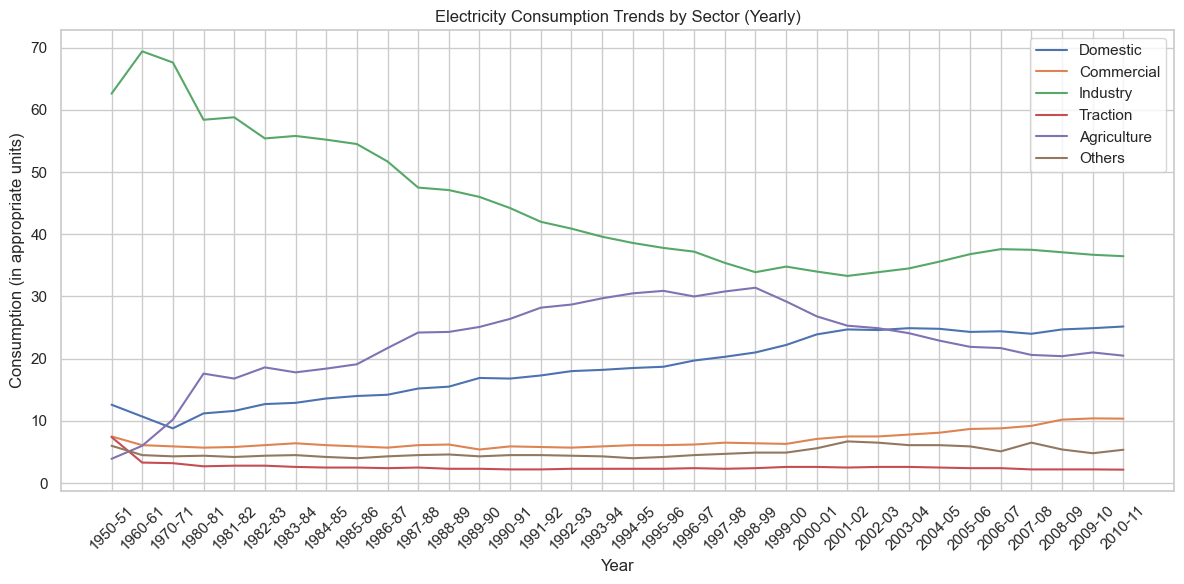

In [221]:
plt.figure(figsize=(12,6))
for col in df1_cleaned.columns:
    if col != 'Year':
        plt.plot(df1_cleaned['Year'], df1_cleaned[col], label=col)

plt.title("Electricity Consumption Trends by Sector (Yearly)")
plt.xticks(rotation=45)  
plt.xlabel("Year")
plt.ylabel("Consumption (in appropriate units)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

SECTOR WISE CONSUMPTION FOR THE YEAR 2010-11

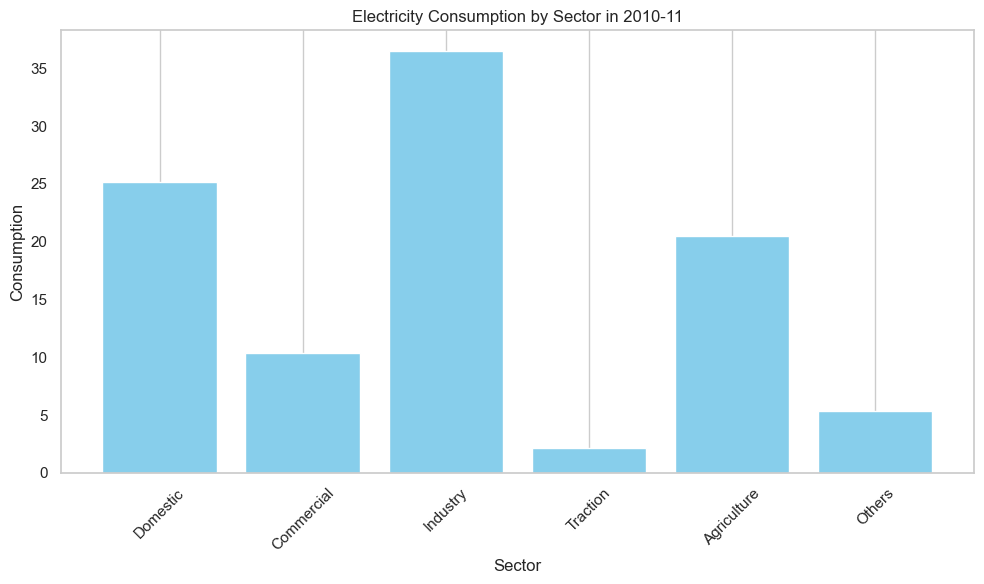

In [222]:
latest_year = df1_cleaned['Year'].max()

# Filter the row for the latest year
latest_data = df1_cleaned[df1_cleaned['Year'] == latest_year]

# Drop the 'Year' column to get only sector values
sector_data = latest_data.drop('Year', axis=1).T  # Transpose to get sectors on x-axis

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(sector_data.index, sector_data[latest_data.index[0]], color='skyblue')

plt.title(f"Electricity Consumption by Sector in {latest_year}")
plt.xlabel("Sector")
plt.ylabel("Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

HEAT MAP FOR CORRELATION BETWEEN THE SECTORS


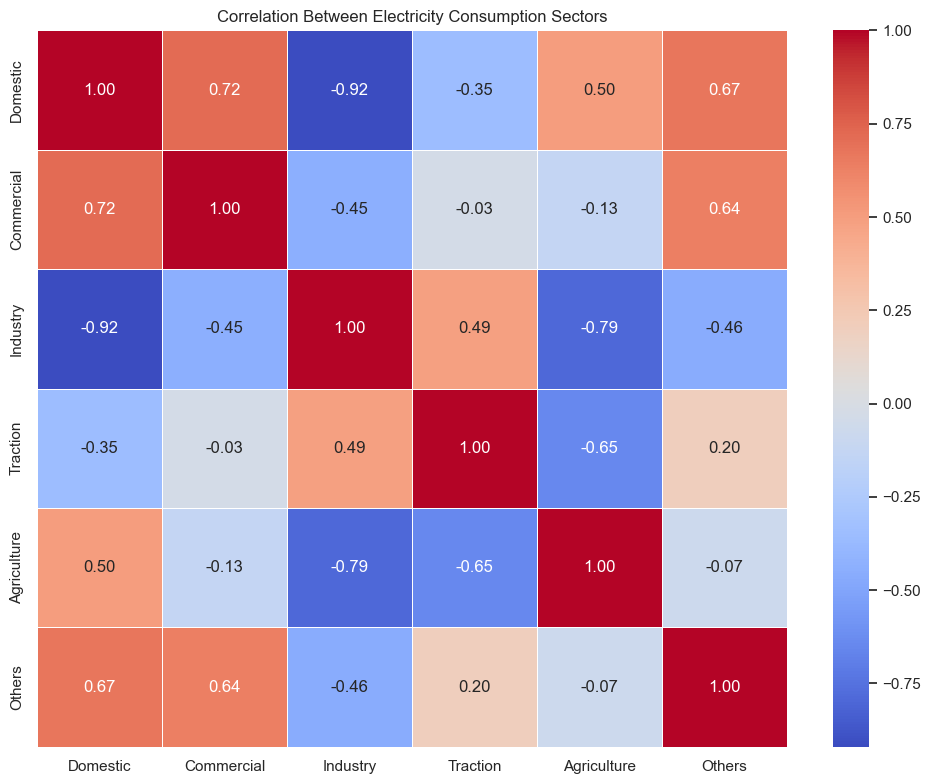

In [223]:
# Drop the 'Year' column to only include sector consumption values
sector_only = df1_cleaned.drop('Year', axis=1)

# Compute correlation matrix
corr_matrix = sector_only.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Electricity Consumption Sectors")
plt.tight_layout()
plt.show()

AREA PLOT — CUMMULATIVE SECTOR CONSUMPTION OVER THE YEARS

<Figure size 1200x600 with 0 Axes>

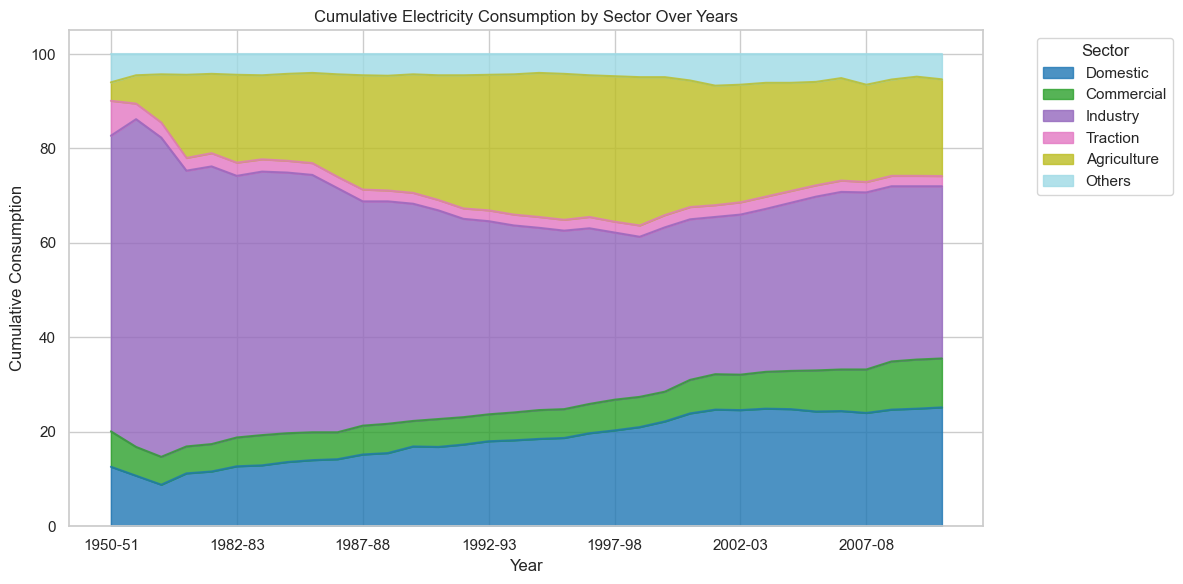

In [224]:

df1_cleaned = df1_cleaned.sort_values('Year')

# Set 'Year' as index for area plot
df_area = df1_cleaned.set_index('Year')

# Plot stacked area plot
plt.figure(figsize=(12,6))
df_area.plot(kind='area', stacked=True, cmap='tab20', alpha=0.8)

plt.title("Cumulative Electricity Consumption by Sector Over Years")
plt.xlabel("Year")
plt.ylabel("Cumulative Consumption")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

PIE CHART - SECTOR SHARE FOR 2010-11

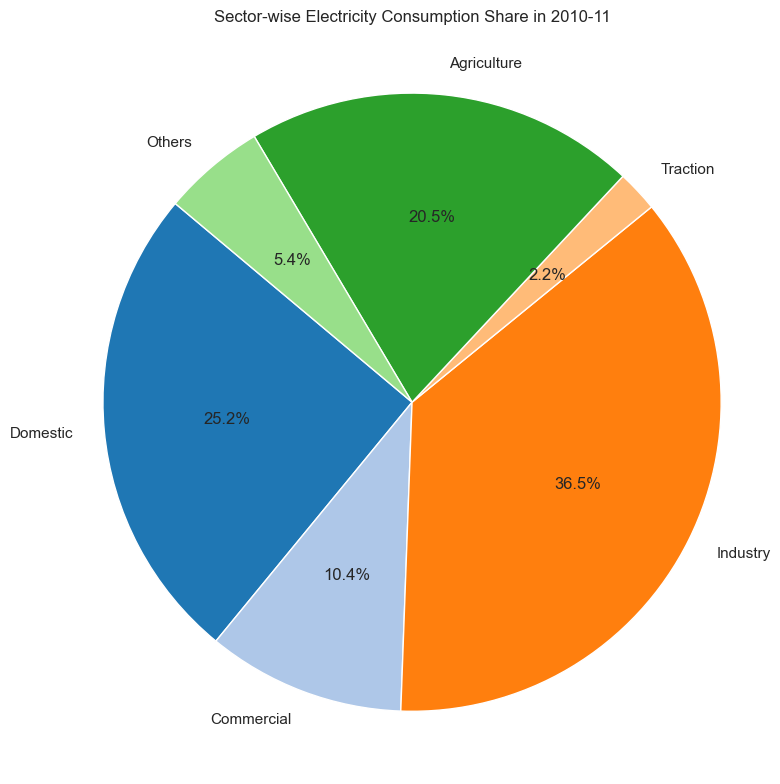

In [225]:
# Get the latest year
latest_year = df1_cleaned['Year'].max()

# Filter data for the latest year
latest_data = df1_cleaned[df1_cleaned['Year'] == latest_year].drop('Year', axis=1).T

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(latest_data[latest_data.columns[0]], 
        labels=latest_data.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.tab20.colors)

plt.title(f"Sector-wise Electricity Consumption Share in {latest_year}")
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()

In [226]:
print(df1_cleaned['Year'].dtype)
print(df1_cleaned['Year'].unique()[:20])
print(df1_cleaned.head())


object
['1950-51' '1960-61' '1970-71' '1980-81' '1981-82' '1982-83' '1983-84'
 '1984-85' '1985-86' '1986-87' '1987-88' '1988-89' '1989-90' '1990-91'
 '1991-92' '1992-93' '1993-94' '1994-95' '1995-96' '1996-97']
      Year  Domestic  Commercial  Industry  Traction  Agriculture  Others
0  1950-51      12.6         7.5      62.6       7.4          3.9     6.0
1  1960-61      10.7         6.1      69.4       3.3          6.0     4.5
2  1970-71       8.8         5.9      67.6       3.2         10.2     4.3
3  1980-81      11.2         5.7      58.4       2.7         17.6     4.4
4  1981-82      11.6         5.8      58.8       2.8         16.8     4.2


In [227]:
# function to extract start year from "1950-51"
def extract_start_year(year_str):
    # year_str like "1950-51"
    if isinstance(year_str, str):
        # Split by hyphen
        parts = year_str.split('-')
        if len(parts) == 2:
            # First part is full year
            return int(parts[0])
        else:
            # convert full string to int
            try:
                return int(year_str)
            except:
                return None
    else:
        return None

# Apply to year column
df1_cleaned['Year'] = df1_cleaned['Year'].apply(extract_start_year)

# Drop rows where conversion failed
df1_cleaned = df1_cleaned.dropna(subset=['Year'])

# Convert to int
df1_cleaned['Year'] = df1_cleaned['Year'].astype(int)


DEFINING PERIODS

In [228]:
periods = {
    '1950-1970': (1950, 1970),
    '1971-1990': (1971, 1990),
    '1991-2011': (1991, 2011)
}

period_dfs = {}
for name, (start, end) in periods.items():
    period_dfs[name] = df1_cleaned[(df1_cleaned['Year'] >= start) & (df1_cleaned['Year'] <= end)]
    print(f"{name}: {len(period_dfs[name])} rows")



1950-1970: 3 rows
1971-1990: 11 rows
1991-2011: 20 rows


In [229]:
print(df1_cleaned['Year'].head(10))
print(df1_cleaned['Year'].dtype)


0    1950
1    1960
2    1970
3    1980
4    1981
5    1982
6    1983
7    1984
8    1985
9    1986
Name: Year, dtype: int64
int64


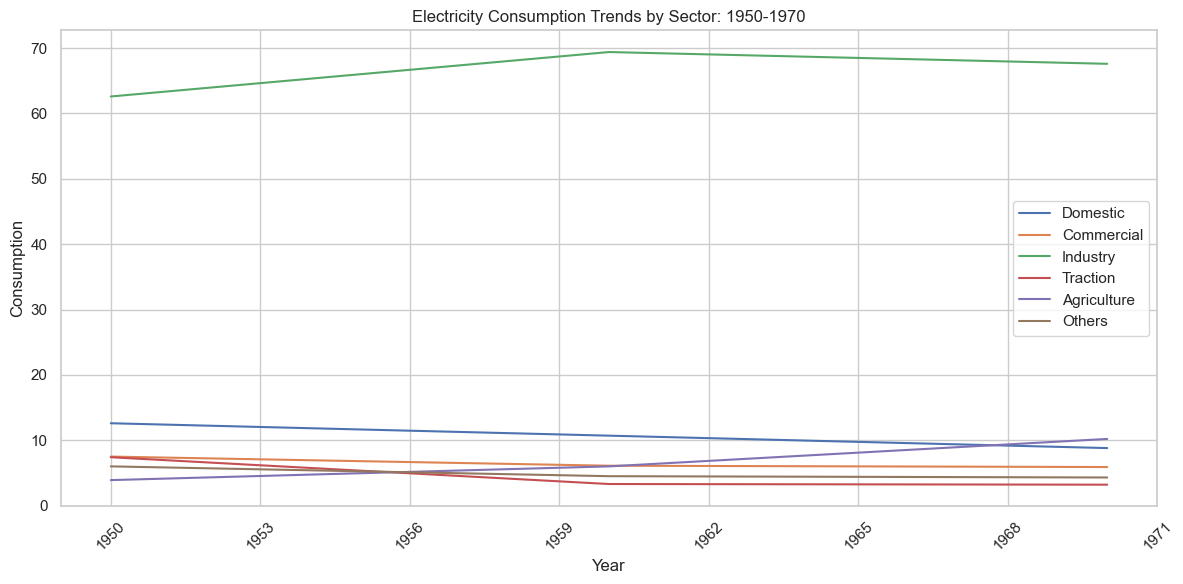

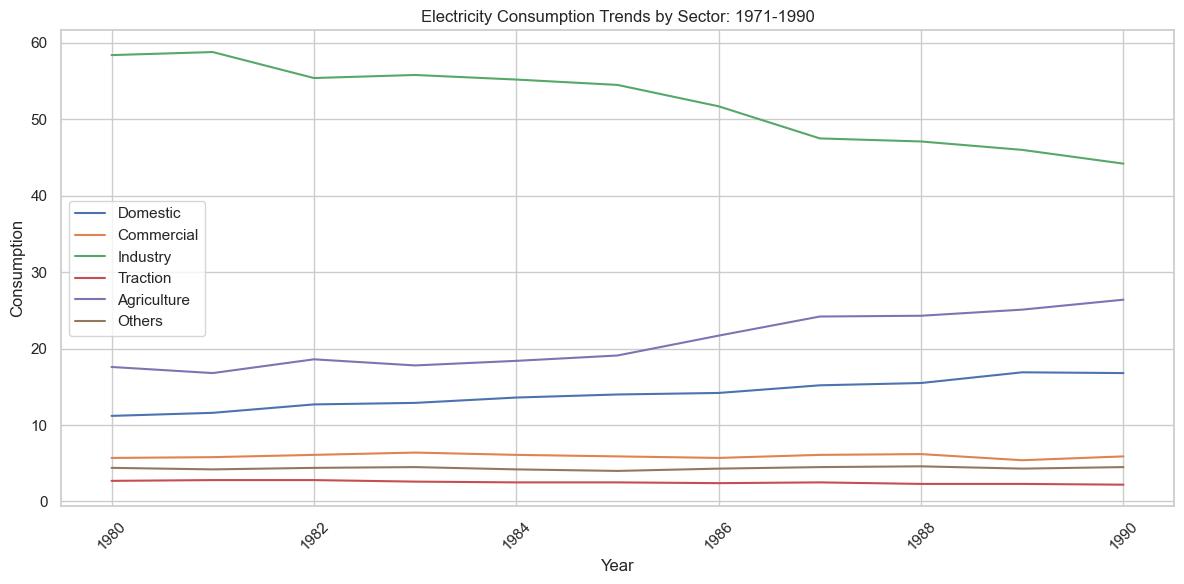

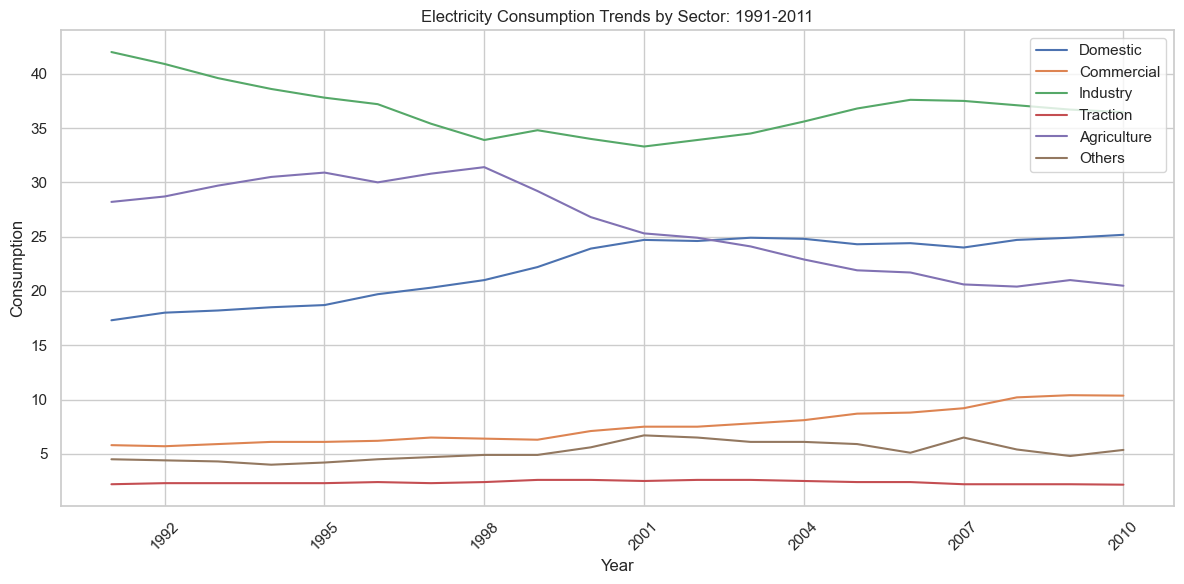

In [230]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

for name, df_period in period_dfs.items():
    plt.figure(figsize=(12,6))
    for col in df_period.columns:
        if col != 'Year':
            plt.plot(df_period['Year'], df_period[col], label=col)
    plt.title(f"Electricity Consumption Trends by Sector: {name}")
    plt.xlabel("Year")
    plt.ylabel("Consumption")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()
